Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Create Sample Data

In [2]:
cities = ["City A", "City B", "City C", "City D"]
months = pd.date_range(start="2025-01-01", periods=12, freq="M").strftime("%b")

np.random.seed(42)
PM25 = np.random.randint(40, 120, (12, 4))   # 12 months × 4 cities
PM10  = np.random.randint(60, 180, (12, 4))
NO2   = np.random.randint(20, 90, (12, 4))

C:\Users\priya\AppData\Local\Temp\ipykernel_18772\1527216032.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2025-01-01", periods=12, freq="M").strftime("%b")


3D Scatter Plot with Annotation

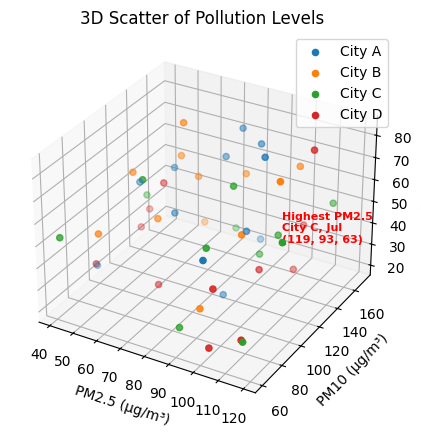

In [5]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection="3d")

# Scatter for each city
for i, city in enumerate(cities):
    ax.scatter(PM25[:, i], PM10[:, i], NO2[:, i], label=city)

# Find the city+month with max PM2.5
max_val = PM25.max()
loc = np.where(PM25 == max_val)
month_idx, city_idx = loc[0][0], loc[1][0]

x = PM25[month_idx, city_idx]
y = PM10[month_idx, city_idx]
z = NO2[month_idx, city_idx]

# Add annotation
ax.text(x, y, z,
        f"Highest PM2.5\n{cities[city_idx]}, {months[month_idx]}\n({x}, {y}, {z})",
        color="red", fontsize=8, fontweight="bold")

ax.set_xlabel("PM2.5 (µg/m³)")
ax.set_ylabel("PM10 (µg/m³)")
ax.set_zlabel("NO2 (µg/m³)")
ax.set_title("3D Scatter of Pollution Levels")
ax.legend()


3D Bar Chart (Monthly PM2.5)

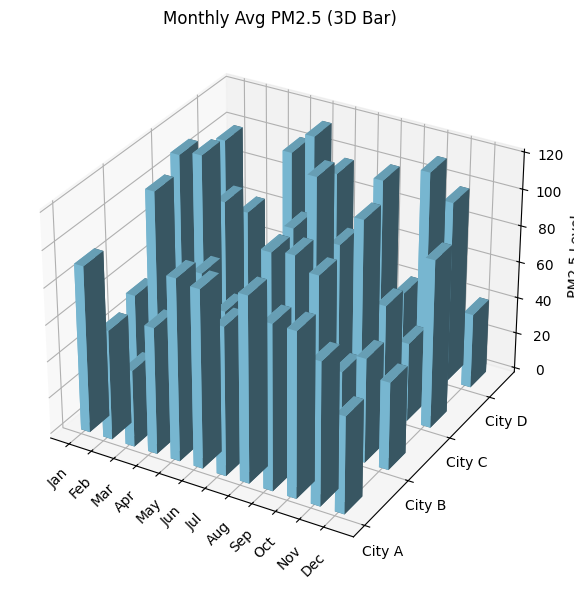

In [7]:
fig = plt.figure(figsize=(10, 7))
ax2 = fig.add_subplot(111, projection="3d")

dx = dy = 0.4
for m in range(len(months)):
    for c in range(len(cities)):
        x = m
        y = c
        z = 0
        dz = PM25[m, c]
        ax2.bar3d(x, y, z, dx, dy, dz, color='skyblue')

ax2.set_xticks(range(len(months)))
ax2.set_xticklabels(months, rotation=45)
ax2.set_yticks(range(len(cities)))
ax2.set_yticklabels(cities)
ax2.set_zlabel("PM2.5 Level")
ax2.set_title("Monthly Avg PM2.5 (3D Bar)")

plt.show()

Heatmap

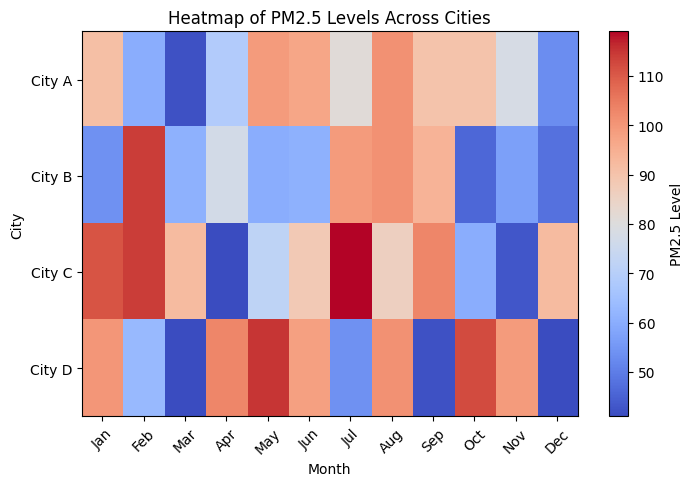

In [8]:
plt.figure(figsize=(8, 5))
plt.imshow(PM25.T, cmap="coolwarm", aspect="auto")

plt.colorbar(label="PM2.5 Level")
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=45)
plt.yticks(ticks=np.arange(len(cities)), labels=cities)

plt.title("Heatmap of PM2.5 Levels Across Cities")
plt.xlabel("Month")
plt.ylabel("City")
plt.show()